In [ ]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from PIL import Image
import random
from skimage.util import random_noise
from skimage import transform
from skimage import exposure
from cv2 import resize

In [ ]:
img=mpimg.imread("/content/Peacock.jpeg")

FileNotFoundError: [Errno 2] No such file or directory: '/content/Peacock.jpeg'

In [ ]:
plt.imshow(img)

In [ ]:
imgr=resize(img,(100,100))

In [ ]:
plt.imshow(imgr)

In [ ]:
hf=np.fliplr(img)
plt.imshow(hf)

In [ ]:
hf=np.flipud(img)
plt.imshow(hf)

In [ ]:
ri=transform.rotate(img,90)
plt.imshow(ri)

In [ ]:
n=random_noise(img,mode="s&p",clip=True)
plt.imshow(n)

In [ ]:
pip install keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

from keras import backend as K

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
n=10
bs=64
epochs=24
rows,cols=28,28

In [ ]:
X_train.shape
X_test.shape

(10000, 28, 28)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],rows,cols,1)
X_test=X_test.reshape(X_test.shape[0],rows,cols,1)
shape=(rows,cols,1)

In [ ]:
X_train=X_train.astype("float")
X_test=X_test.astype("float")
X_train/=255
X_test/=255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print(y_train[0:3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="softmax"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist=model.fit(X_train,y_train,batch_size=64,epochs=24,verbose=1,validation_data=(X_test,y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1891 - loss: 2.0743 - val_accuracy: 0.4284 - val_loss: 1.7205
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2612 - loss: 1.8085 - val_accuracy: 0.5444 - val_loss: 1.4629
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3316 - loss: 1.6614 - val_accuracy: 0.5827 - val_loss: 1.1753
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3749 - loss: 1.5082 - val_accuracy: 0.7298 - val_loss: 1.0314
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4406 - loss: 1.3921 - val_accuracy: 0.7824 - val_loss: 0.9025
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4515 - loss: 1.3408 - val_accuracy: 0.8493 - val_loss: 0.8430
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5362 - loss: 1.2341 - val_accuracy: 0.8785 - val_loss: 0.6987
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5975 - loss: 1.0928 - val_accuracy: 0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
print("Test Loss",score[0])
print("Test Accuracy",score[1])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Test Loss 0.2884637713432312
Test Accuracy 0.9100000262260437


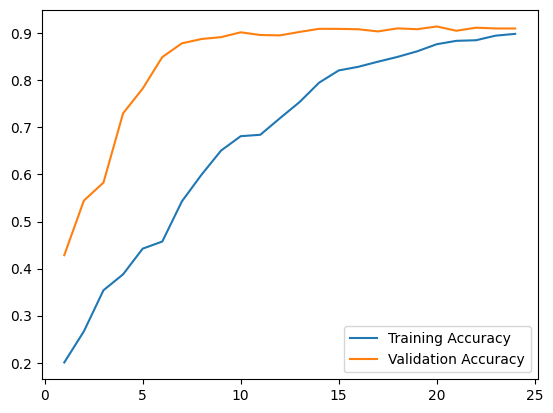

In [ ]:
el=list(range(1,len(hist.history["accuracy"])+1))
plt.plot(el,hist.history["accuracy"],el,hist.history["val_accuracy"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [ ]:
print(el)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
print(hist.history["accuracy"])
print(hist.history["val_accuracy"])

[0.20053333044052124, 0.26669999957084656, 0.3540000021457672, 0.3877499997615814, 0.4423166811466217, 0.45746666193008423, 0.5427833199501038, 0.5993833541870117, 0.650783360004425, 0.6812499761581421, 0.6842333078384399, 0.7193999886512756, 0.7536500096321106, 0.7949833273887634, 0.8209166526794434, 0.8286666870117188, 0.8394833207130432, 0.8496999740600586, 0.8615166544914246, 0.8766000270843506, 0.8838000297546387, 0.8850499987602234, 0.8948000073432922, 0.8985999822616577]
[0.4284000098705292, 0.5443999767303467, 0.5827000141143799, 0.7297999858856201, 0.7824000120162964, 0.8493000268936157, 0.8784999847412109, 0.8877000212669373, 0.891700029373169, 0.9018999934196472, 0.8962000012397766, 0.8953999876976013, 0.9027000069618225, 0.9093000292778015, 0.9092000126838684, 0.9083999991416931, 0.9038000106811523, 0.9103000164031982, 0.9085000157356262, 0.9143000245094299, 0.9052000045776367, 0.9117000102996826, 0.910099983215332, 0.9100000262260437]


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

In [ ]:
import tensorflow

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


KeyboardInterrupt: 

In [ ]:
!pip install -q kaggle

# Now download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the dataset
!unzip chest-xray-pneumonia.zip -d chest_xray


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open chest-xray-pneumonia.zip, chest-xray-pneumonia.zip.zip or chest-xray-pneumonia.zip.ZIP.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
DataDir=r"chest_xray/chest_xray/train/"
CATEGORIES=["Normal","Pneumonia"]

In [ ]:
import os

In [ ]:
! cd chest_xray

In [ ]:
! cd chest_xray/chest_xray/test/
! ls test

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

Data = "chest_xray/chest_xray"  # Correct base path
CATEGORIES = ["NORMAL", "PNEUMONIA"]  # Correct folder names

for category in CATEGORIES:
    path = os.path.join(Data, "train", category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.title(category)
        plt.axis('off')
        plt.show()
        break  # just show one image per category


In [ ]:
img_size=100
ar=cv2.resize(img_array,(img_size,img_size))
plt.imshow(ar,cmap="gray")

In [ ]:
t=[]
def create():
  for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    class_num=CATEGORIES.index(i)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        t.append([new_array,class_num])
      except Exception as e:
        pass
create()

In [ ]:
print(t)

In [ ]:
print(len(t))

In [ ]:
import random
random.shuffle(t)
for s in t[:10]:
  print(s)

In [ ]:
print(t[0])

In [ ]:
X=[]
y=[]

In [ ]:
for features, label in t:
    X.append(features)
    y.append(label)

In [ ]:
print(X[0].reshape(-1,img_size,img_size,1))
len(X[0])

In [ ]:
y = np.array(y, dtype=np.int32)  # Correct

In [ ]:
X=np.array(X).reshape(-1,img_size,img_size,1)

In [ ]:
Validation=[]
DataDir=r"chest_xray/chest_xray/val/"
CATEGORIES=["NORMAL","PNEUMONIA"]
def create_v():
  for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    class_num=CATEGORIES.index(i)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        Validation.append([new_array,class_num])
      except Exception as e:
        pass
create_v()

In [ ]:
print(len(Validation))

In [ ]:
import random
random.shuffle(Validation)
for sa in Validation[:10]:
  print(sa)

In [ ]:
X_val=[]
y_val=[]
for features, label in Validation:
    X_val.append(features)
    y_val.append(label)

In [ ]:
y_val=np.array(y_val,dtype=np.int32)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [ ]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
X=X/255.0
y=y/255.0

In [ ]:
X.shape

In [ ]:
X_val.shape

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X,y,batch_size=32,epochs=10,validation_data=(X_val,y_val))

In [ ]:
import cv2
import matplotlib.image as mpimg
from keras.models import load_model

##Pre-Trained Model

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img=100
model=VGG16(input_shape=(img,img,3),include_top=False,weights="imagenet")

In [ ]:
for l in model.layers :
  l.trainable=False

In [ ]:
x=Flatten()(model.output)
x=Dense(256,activation="relu")(x)
x=Dense(128,activation="relu")(x)
x=Dense(64,activation="relu")(x)
pred=Dense(1,activation="sigmoid")(x)

In [ ]:
nmodel=Model(inputs=model.input,outputs=pred)

In [ ]:
nmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
train_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/val"


In [ ]:
traing=train.flow_from_directory(train_dir,target_size=(img,img),batch_size=32,class_mode="binary")
testing=test.flow_from_directory(val_dir,target_size=(img,img),batch_size=32,class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
nmodel.fit(traing,validation_data=testing,epochs=10,steps_per_epoch=len(traing),validation_steps=len(testing))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 599ms/step - accuracy: 0.8646 - loss: 0.3062 - val_accuracy: 0.6875 - val_loss: 0.6693
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 377ms/step - accuracy: 0.9380 - loss: 0.1617 - val_accuracy: 0.9375 - val_loss: 0.1898
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 391ms/step - accuracy: 0.9401 - loss: 0.1468 - val_accuracy: 0.8750 - val_loss: 0.2343
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 380ms/step - accuracy: 0.9475 - loss: 0.1367 - val_accuracy: 0.8125 - val_loss: 0.2872
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 375ms/step - accuracy: 0.9448 - loss: 0.1442 - val_accuracy: 0.8750 - val_loss: 0.2711
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 379ms/step - accuracy: 0.9528 - loss: 0.1229 - val_accuracy: 0.8750 - val_loss: 0.1863
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 373ms/step - accuracy: 0.9593 - loss: 0.1138 - val_accuracy: 0.8750 - val_loss: 0.2010
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 376ms/step - accuracy: 0.9566 - loss:

In [ ]:
test_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/test"
testd=ImageDataGenerator(rescale=1./255)
testing=testd.flow_from_directory(test_dir,target_size=(img,img),batch_size=32,class_mode="binary")
test_loss,test_acc=nmodel.evaluate(testing)
print("Test Accuracy:",test_acc)


Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 401ms/step - accuracy: 0.9245 - loss: 0.1903
Test Accuracy: 0.9102563858032227


In [ ]:
nmodel.save("model.h5")

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>